<!-- # Analysis of rod_cleaned_final.csv
- outliers removed from original csv
- some columns are normalized -->

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/rod_cleaned_final.csv')

<!-- Lets begin to see all the different variables and their distrubution. -->

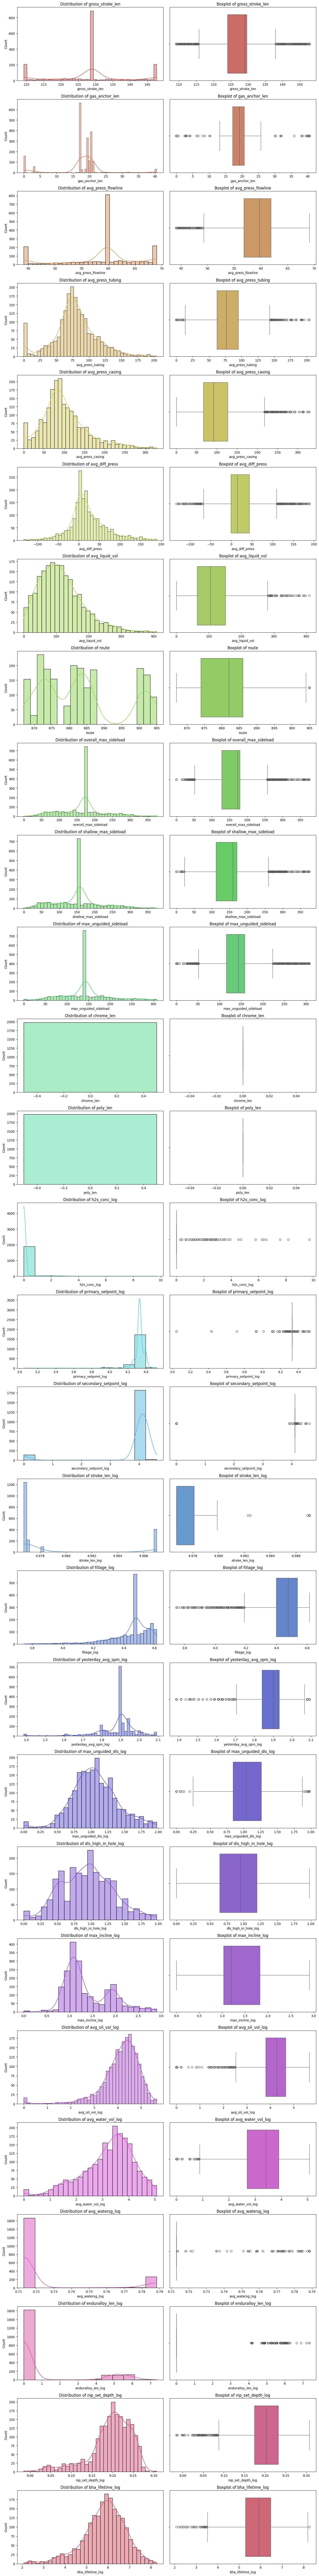

In [2]:
df_numeric = df.select_dtypes(include = 'number')

# Set up subplots
fig, axes = plt.subplots(len(df_numeric.columns), 2, figsize=(14, len(df_numeric.columns) * 4))

palette = sns.color_palette("hls", len(df_numeric.columns))

for i, col in enumerate(df_numeric.columns):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color=palette[i])
    axes[i, 0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color=palette[i])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [3]:
# # Define numeric variables with descriptions

# # WILL IMPLEMENT A FUNCTION THAT CONNECTS
# # THE DESCRIPTION CSV FILE TO THIS
# # SO WE DON'T HAVE TO HARD CODE IT

# numeric_vars = {
#     'avg_press_flowline': "Avg pressure at the flowline, indicating backpressure effects.",
#     'avg_press_tubing': "Avg tubing pressure inside the production tubing.",
#     'avg_diff_press': "Difference between tubing and flowline pressure, helps detect restrictions.",
#     'stroke_len': "Length of a single stroke in the rod pump.",
#     'gross_stroke_len': "Total stroke length (upstroke + downstroke).",
#     'fillage': "Percentage of pump barrel filled with fluid per stroke.",
#     'yesterday_avg_spm': "Avg strokes per minute (SPM) from the previous day.",
#     'avg_oil_vol': "Avg volume of oil produced over time.",
#     'avg_water_vol': "Avg volume of water produced, indicating water cut.",
#     'avg_liquid_vol': "Total produced liquids (oil + water)."
# }

# df_numeric = df.select_dtypes(include = 'number')

# # Set up subplots
# fig, axes = plt.subplots(len(numeric_vars), 2, figsize=(14, len(numeric_vars) * 4))

# for i, (var, description) in enumerate(numeric_vars.items()):
#     # Histogram
#     sns.histplot(df[var], kde=True, ax=axes[i, 0])
#     axes[i, 0].set_title(f'Distribution of {var}')
#     axes[i, 0].annotate(description, xy=(0.02, 0.95), xycoords='axes fraction', fontsize=10, 
#                          color='black', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", alpha=0.1))

#     # Boxplot
#     sns.boxplot(x=df[var], ax=axes[i, 1])
#     axes[i, 1].set_title(f'Boxplot of {var}')
#     axes[i, 1].annotate(description, xy=(0.02, 0.95), xycoords='axes fraction', fontsize=10, 
#                          color='black', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", alpha=0.1))

# plt.tight_layout()
# plt.show()

<!-- Now let's go ahead and show some big correlations -->

In [4]:
# drop these columns for now because the values are just 0
df_numeric.drop(columns = ['chrome_len', 'poly_len'], inplace = True)

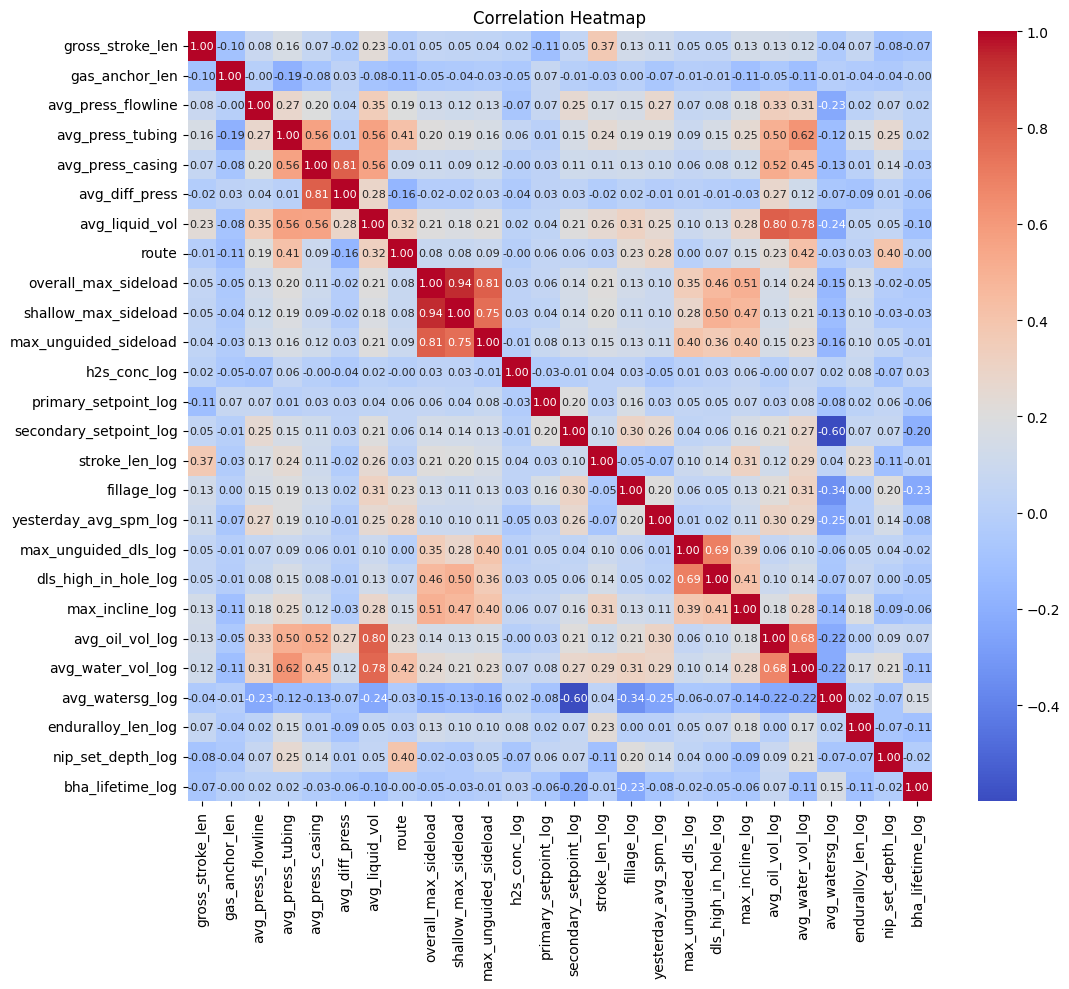

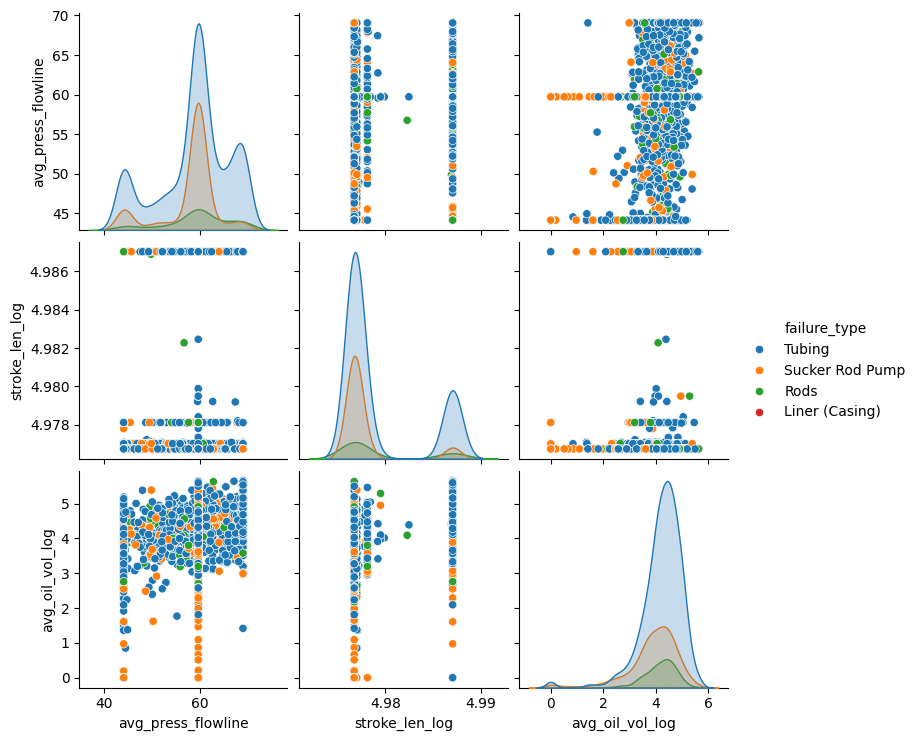

In [5]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for key variables
sns.pairplot(df, vars=['avg_press_flowline', 'stroke_len_log', 'avg_oil_vol_log'], hue='failure_type')
plt.show()

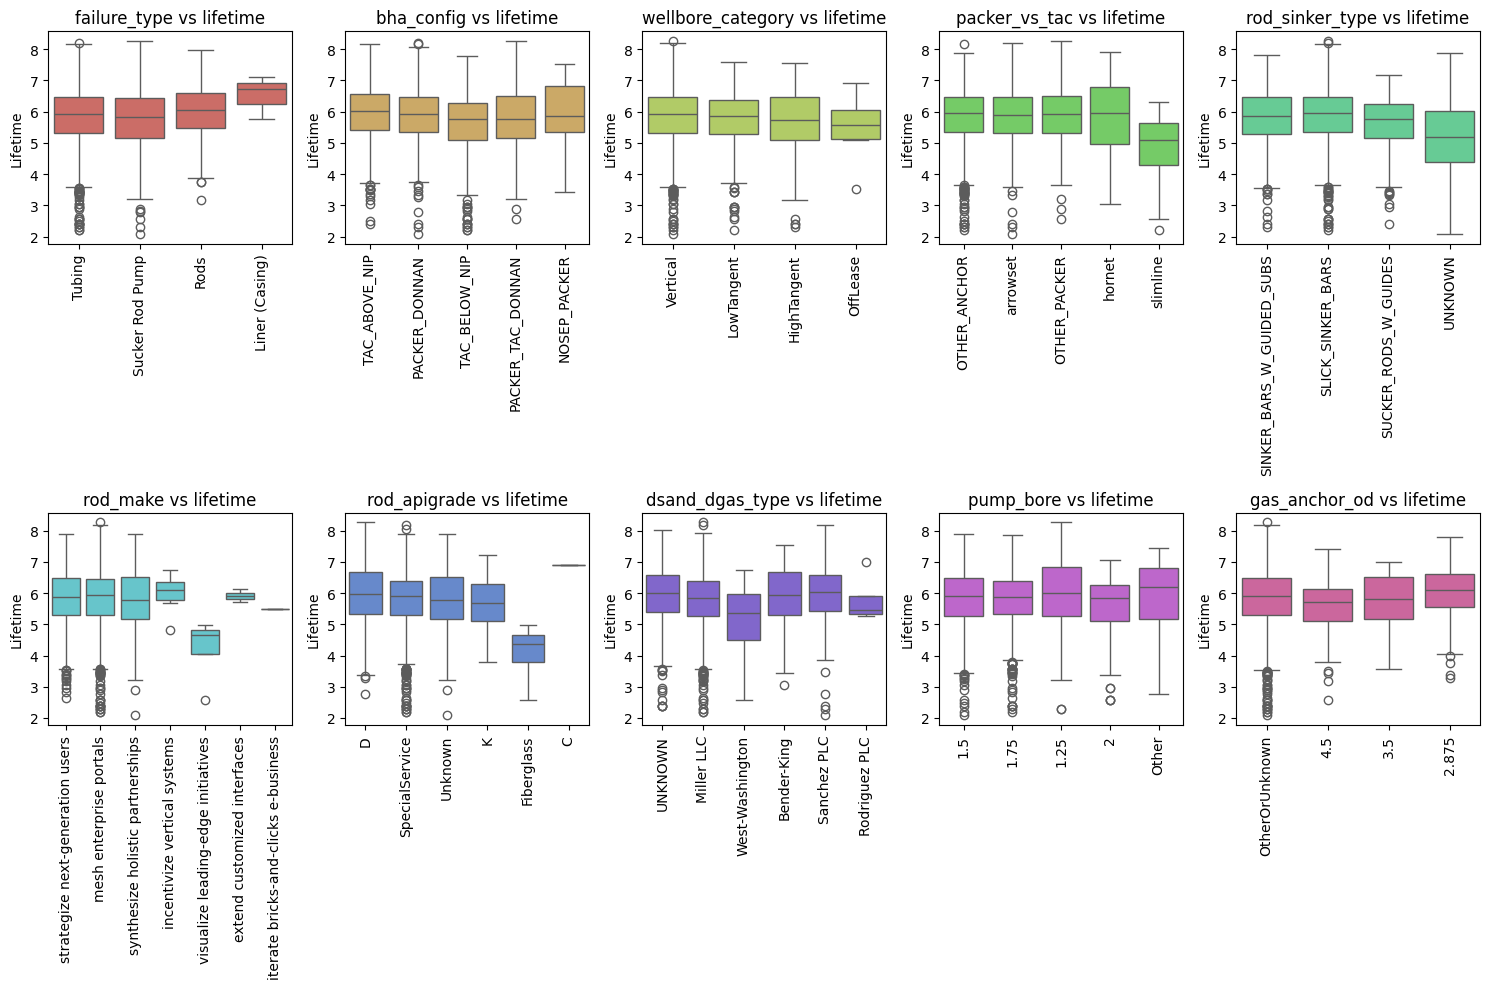

In [6]:
df_cat = df.select_dtypes(include = 'object')
for col in df_cat.columns:
    if len(df_cat[col].unique()) >= 10:
        df_cat.drop(col, axis = 1, inplace = True)

fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

palette = sns.color_palette("hls", len(df_cat.columns))

for i, col in enumerate(df_cat.columns):
    sns.boxplot(data=df, x=col, y='bha_lifetime_log', ax=axes[i], color=palette[i])
    axes[i].set_title(f'{col} vs lifetime', fontsize=12)
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('', fontsize = 1)
    axes[i].set_ylabel('Lifetime', fontsize=10)

# Remove any unused axes if the number of columns is less than the number of subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


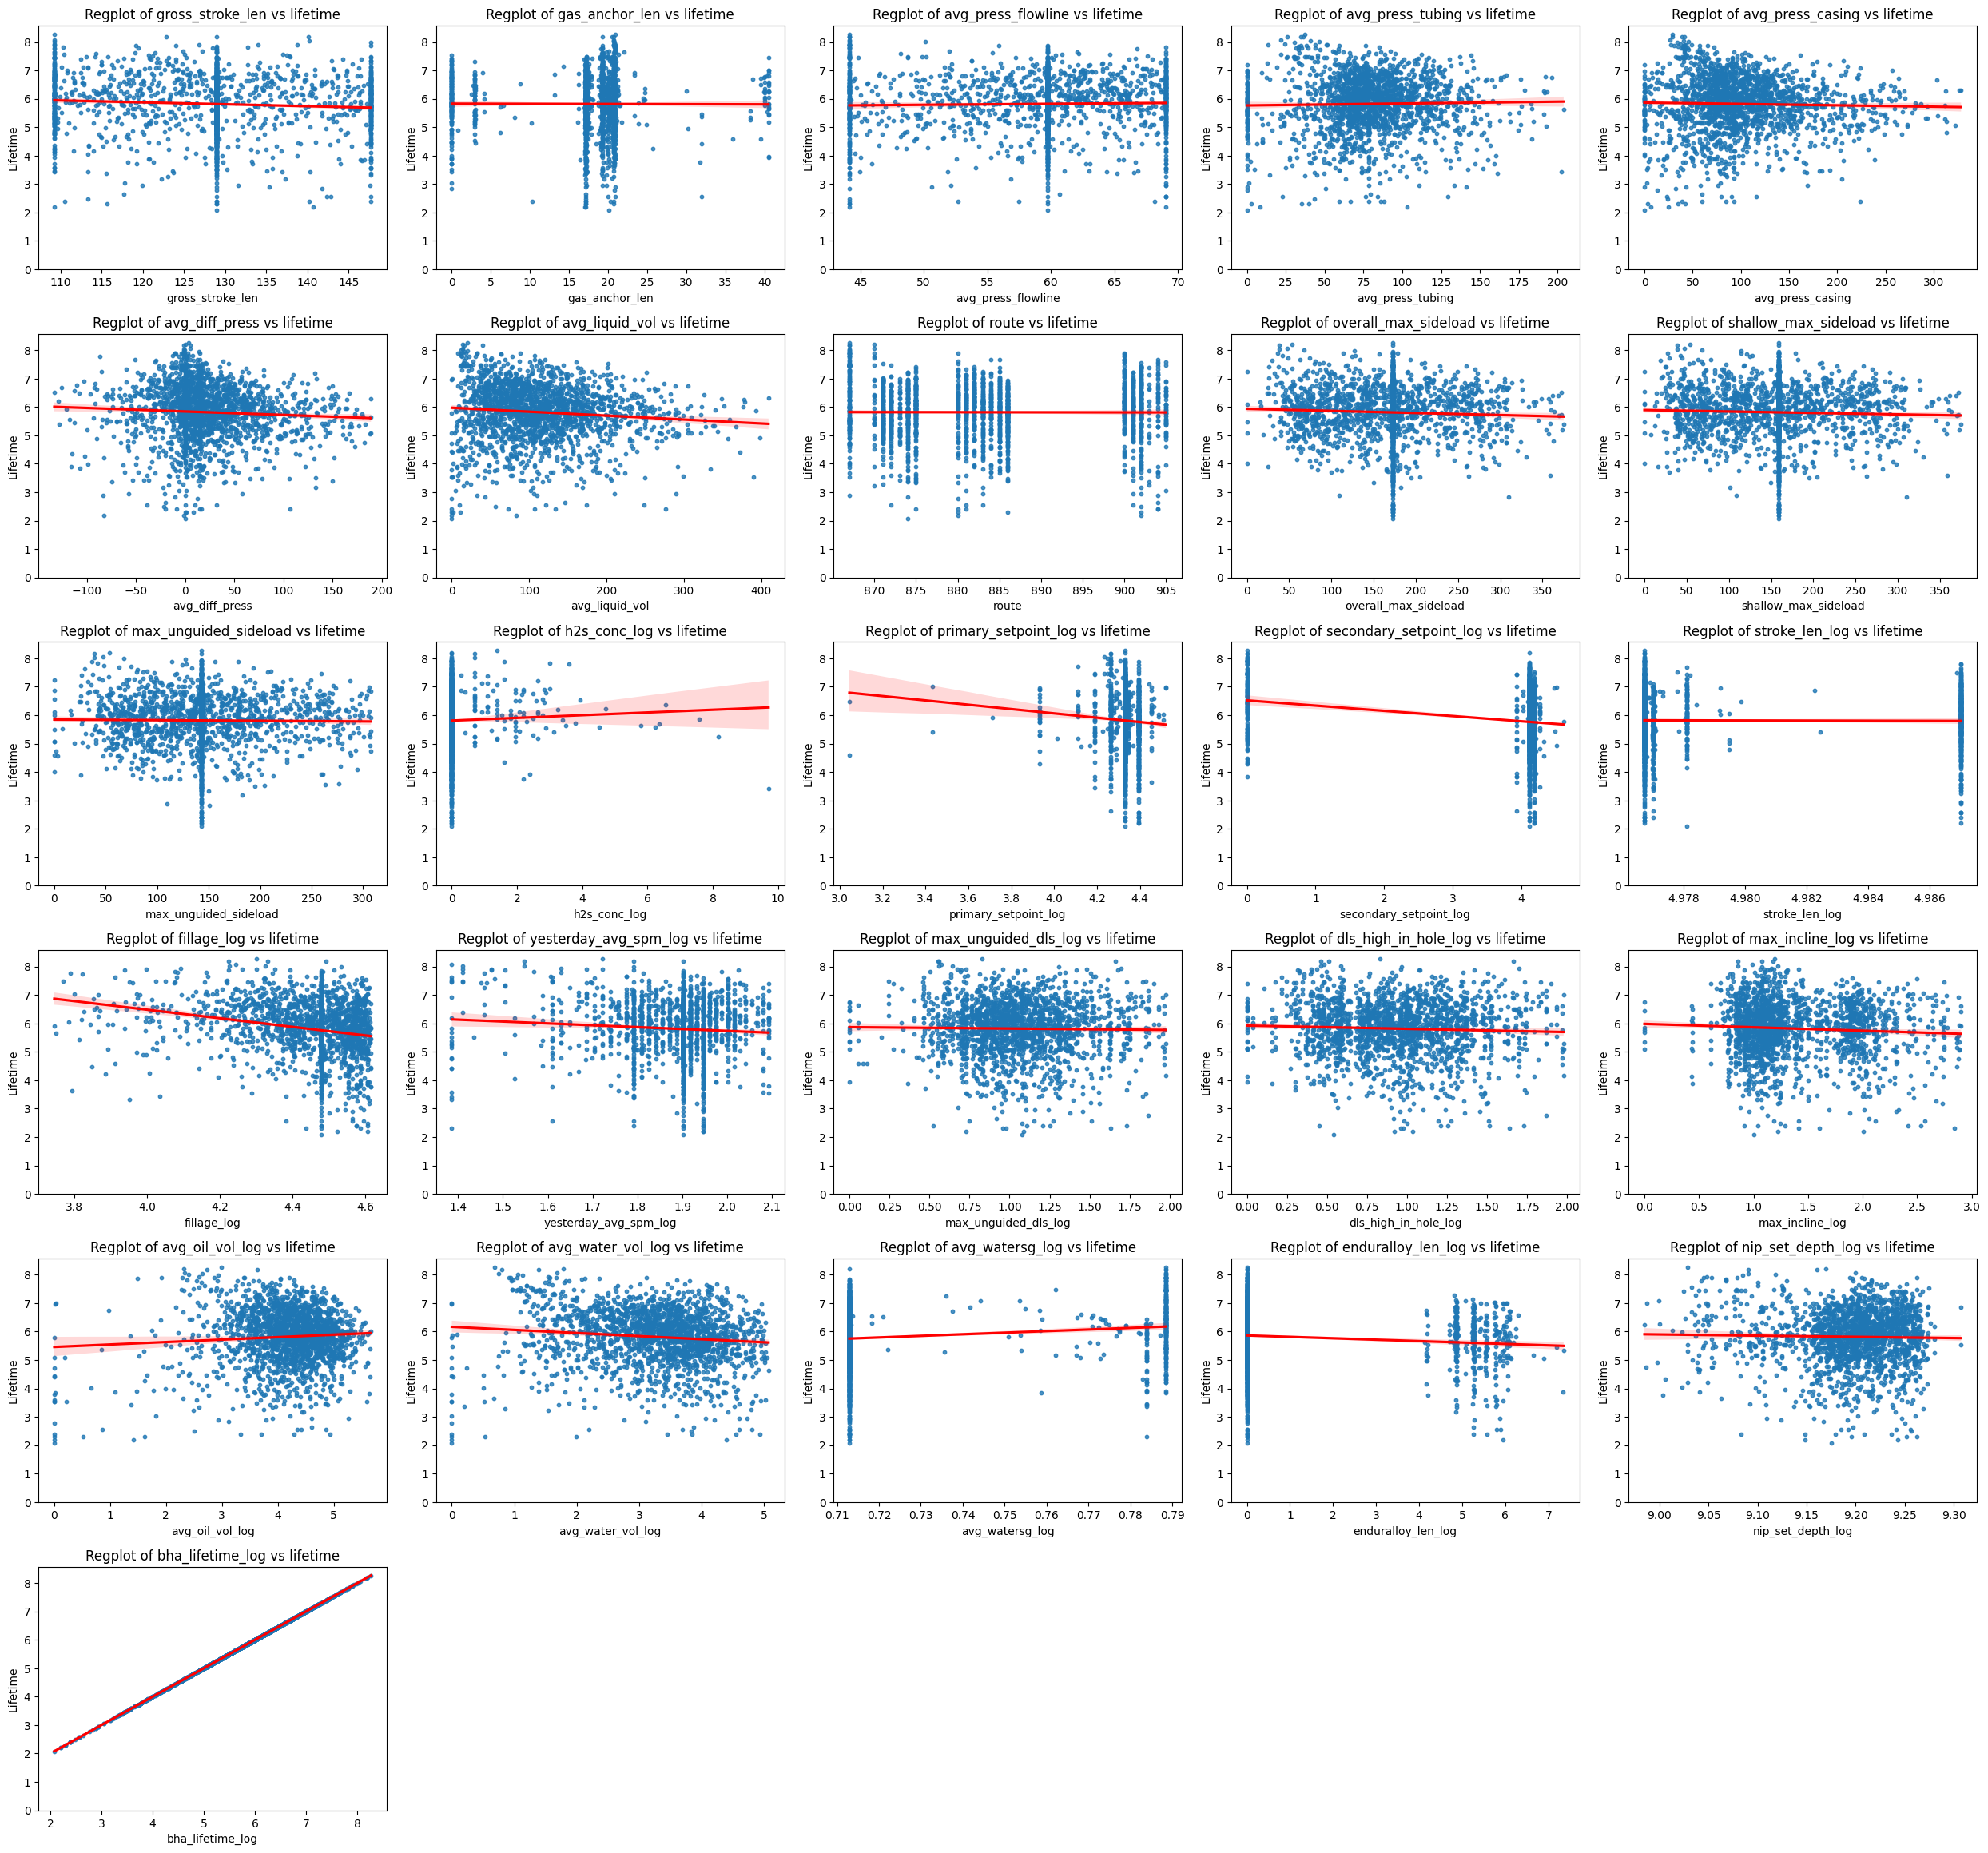

In [7]:
"""Should do for each unique rod pump because otherwise the linear regression plots look wack
It appears that there are a lot of discrete values that I think are from the same rod pumps"""

fig, axes = plt.subplots(len(df_numeric.columns), 5, figsize=(25, 100))  # Adjust the height as needed
axes = axes.flatten()

# Iterate through the continuous columns and create regression plots
for i, col in enumerate(df_numeric.columns):
    sns.regplot(x=col, y='bha_lifetime_log', data=df, ax=axes[i], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    axes[i].set_title(f'Regplot of {col} vs lifetime', fontsize=12)
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].tick_params(axis='x')  # Rotate x-axis labels if needed
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Lifetime', fontsize=10)
    axes[i].set_ylim(0,)  # Set the y-axis limit to start at 0 (optional)

# Remove any unused axes if the number of columns is less than the number of subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


In [8]:
# plt.figure(figsize=(12, 10))
# numeric_vars = ['avg_press_flowline', 'avg_press_tubing', 'avg_diff_press', 'stroke_len', 'gross_stroke_len', 'fillage', 'yesterday_avg_spm', 'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol', 'max_incline', 'max_unguided_dls', 'overall_max_sideload', 'max_unguided_sideload', 'enduralloy_len', 'nip_set_depth']
# correlation_matrix = df[numeric_vars].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()

# # Pairplot for key variables
# sns.pairplot(df, vars=['avg_press_flowline', 'stroke_len', 'avg_oil_vol'], hue='failure_type')
# plt.show()

In [9]:
# Clean the failure_type column to remove any extra spaces and normalize case
df['failure_type'] = df['failure_type'].str.strip().str.title()

# List of failure types
failure_types = ['Tubing', 'Sucker Rod Pump', 'Rods']

# Loop through each failure type
for failure in failure_types:
    # Filter the data for the current failure type
    failure_data = df[df['failure_type'] == failure]

    # Ensure there are no NaN values that could affect correlation
    failure_data_clean = failure_data[df_numeric.columns].dropna()

    # Calculate the correlation matrix for this failure type
    if len(failure_data_clean) > 1:  # Ensure there is more than one row to compute correlations
        corr_matrix = failure_data_clean.corr()

        # Flatten the correlation matrix and sort by absolute value to get the top correlations
        corr_flat = corr_matrix.unstack().sort_values(ascending=False, key=abs)

        # Remove self-correlations (correlation of a variable with itself)
        corr_flat = corr_flat[corr_flat != 1]

        # Get the top 12 correlations
        top_12_corr = corr_flat.head(12)

        # Print the top 12 correlations for each failure type
        print(f"Top 12 Correlations for Failure Type: {failure}")
        print(top_12_corr)
        print("\n" + "-"*50 + "\n")  # Separator for better readability
    else:
        print(f"Not enough data for failure type: {failure}\n")


Top 12 Correlations for Failure Type: Tubing
shallow_max_sideload   overall_max_sideload     0.938921
overall_max_sideload   shallow_max_sideload     0.938921
avg_press_casing       avg_diff_press           0.832525
avg_diff_press         avg_press_casing         0.832525
avg_liquid_vol         avg_oil_vol_log          0.806491
avg_oil_vol_log        avg_liquid_vol           0.806491
overall_max_sideload   max_unguided_sideload    0.790794
max_unguided_sideload  overall_max_sideload     0.790794
avg_water_vol_log      avg_liquid_vol           0.777055
avg_liquid_vol         avg_water_vol_log        0.777055
shallow_max_sideload   max_unguided_sideload    0.728820
max_unguided_sideload  shallow_max_sideload     0.728820
dtype: float64

--------------------------------------------------

Top 12 Correlations for Failure Type: Sucker Rod Pump
shallow_max_sideload   overall_max_sideload     0.965425
overall_max_sideload   shallow_max_sideload     0.965425
                       max_unguided

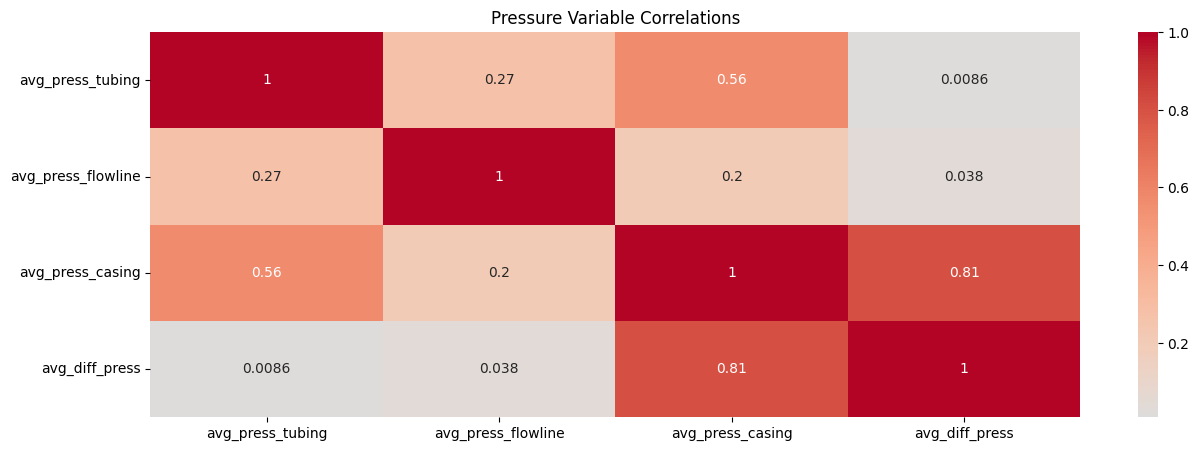


Summary Statistics by Failure Type:
                 overall_max_sideload  avg_liquid_vol  h2s_conc_log  \
failure_type                                                          
Liner (Casing)                 140.91           81.49          0.00   
Rods                           176.37          113.90          0.10   
Sucker Rod Pump                150.39           87.39          0.06   
Tubing                         168.09          123.71          0.14   

                 avg_press_tubing  
failure_type                       
Liner (Casing)              29.00  
Rods                        82.71  
Sucker Rod Pump             61.36  
Tubing                      83.44  


In [10]:
def analyze_pressure_relationships(df):
    plt.figure(figsize=(15, 5))
    
    # Plot pressure correlations
    pressure_vars = ['avg_press_tubing', 'avg_press_flowline', 
                    'avg_press_casing', 'avg_diff_press']
    
    corr_pressure = df[pressure_vars].corr()
    
    sns.heatmap(corr_pressure, annot=True, cmap='coolwarm', center=0)
    plt.title('Pressure Variable Correlations')
    plt.show()

# Run the analyses
analyze_pressure_relationships(df)

# Print summary statistics for each failure type
print("\nSummary Statistics by Failure Type:")
failure_stats = df.groupby('failure_type').agg({
    'overall_max_sideload': 'mean',
    'avg_liquid_vol': 'mean',
    'h2s_conc_log': 'mean',
    'avg_press_tubing': 'mean'
}).round(2)

print(failure_stats)

<!-- Liner (Casing) Failures:


Has the lowest sideload (77.52) of all failure types
Moderate liquid volume (98.07)
No H2S concentration (0.00)
Lowest tubing pressure (21.75)
Interpretation: These failures seem to occur in relatively low-stress conditions, suggesting they might be more related to wear and tear or material issues than operational stress


Rod Failures:


Highest sideload (228.06) of all types
High liquid volume (114.53)
Low H2S concentration (0.41)
High tubing pressure (83.82)
Interpretation: Rod failures appear strongly connected to mechanical stress (high sideload) and operational intensity (high volumes and pressure)


Sucker Rod Pump Failures:


Moderate sideload (158.99)
Lowest liquid volume (94.46)
Moderate H2S concentration (1.99)
Moderate tubing pressure (71.14)
Interpretation: These failures show balanced stress across parameters, suggesting they might be more related to normal wear and tear


Tubing Failures:
High sideload (202.03)
Highest liquid volume (135.86)
Highest H2S concentration (14.23)
Highest tubing pressure (91.75)
Interpretation: These failures occur under the most severe conditions - high mechanical stress, high volumes, corrosive conditions (H2S), and high pressure -->


In [11]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import plot_tree
# df_cleaned = df.dropna()

# X = df_cleaned[['avg_watersg_log', 'enduralloy_len_log', 'nip_set_depth_log', 'avg_press_flowline', 
#         'avg_press_tubing', 'avg_press_casing', 'avg_oil_vol_log', 'avg_water_vol_log']]

# y = df_cleaned['bha_lifetime_log']  # This is the target variable


# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest model with max_leaf_nodes set to 6
# model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=15, random_state=42)

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Display the first tree of the random forest
# plt.figure(figsize=(20, 10))
# plot_tree(model.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True)
# plt.show()

# # Display feature importances to see the most important variables
# print("Feature importances:", model.feature_importances_)

# # Optionally: Evaluate the model performance (e.g., R2 score, Mean Squared Error)
# from sklearn.metrics import mean_squared_error, r2_score

# # Calculate MSE and R^2
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Drop non-relevant or unique identifier columns
drop_cols = ['rod_uid', 'uwi', 'well_name', 'well_id', 'bha_tubing_id', 
             'bha_lifetime_start', 'bha_lifetime_end', 'bha_lifetime_id']

df = df.drop(columns=drop_cols, errors='ignore')  # Ignore errors if columns don't exist

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns  # Automatically detect categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure all values are strings before encoding
    label_encoders[col] = le

In [39]:
# Split into features and target variable
X = df.drop(columns=['bha_lifetime_log'])
y = df['bha_lifetime_log']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to retain feature names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=7)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)  # Predictions on training set
y_test_pred = rf_model.predict(X_test)    # Predictions on test set

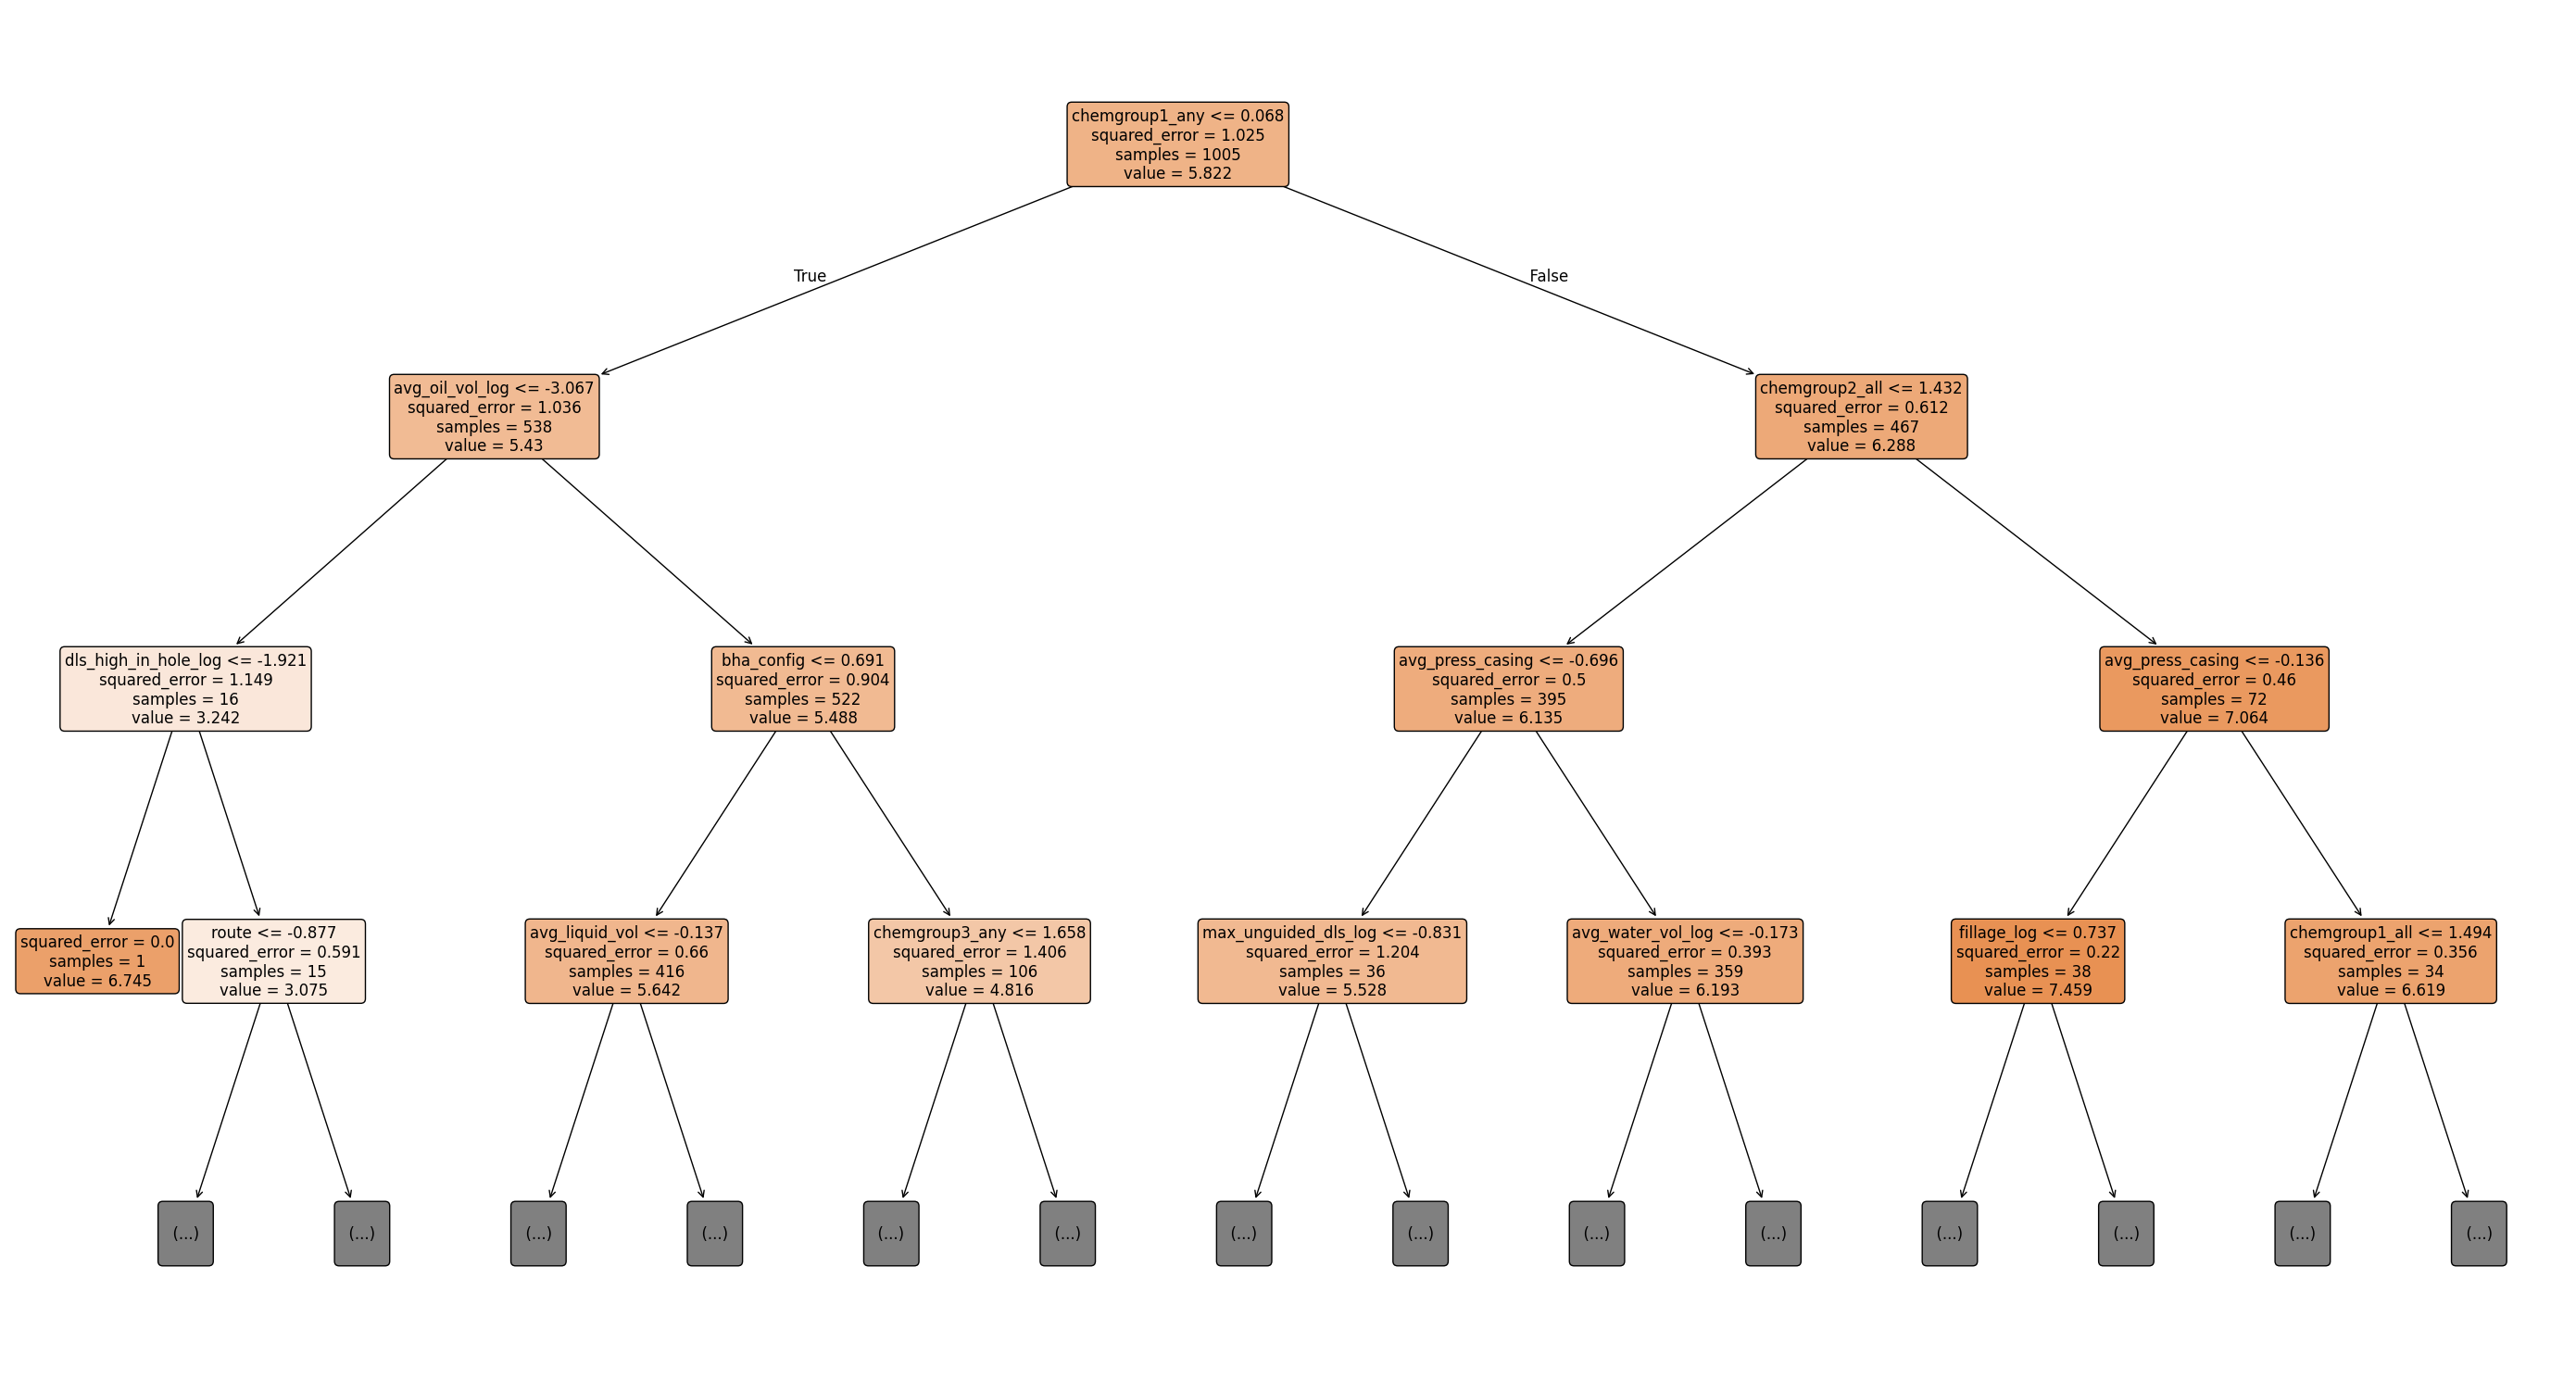

In [70]:
# Display the first tree of the random forest
plt.figure(figsize=(28, 15))
plot_tree(rf_model.estimators_[0],
          filled=True,
          feature_names=X_train.columns,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.tight_layout()
plt.show()

In [41]:
# Display feature importances to see the most important variables
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print("Top 10 Feature Importances:\n", feature_importances.sort_values(ascending=False).head(10), sep='')

# Calculate Train and Test MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate Train and Test R² Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f} \nTest MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f} \nTest R²: {test_r2:.4f}")

Top 10 Feature Importances:
chemgroup1_any       0.230038
chemgroup2_all       0.096813
avg_oil_vol_log      0.092784
avg_water_vol_log    0.071281
fillage_log          0.068103
bha_config           0.039627
avg_press_tubing     0.030258
avg_press_casing     0.030126
avg_liquid_vol       0.028244
avg_diff_press       0.028159
dtype: float64
Train MSE: 0.3187 
Test MSE: 0.5259
Train R²: 0.6662 
Test R²: 0.4299


<!-- so far, i have it to go 15 nodes. i am not sure  -->